# The Sparks Foundation - Data Science and Business Analytics Internship
# Batch - May 2022
# Author - Aman Gupta
# Task 1- Predict the percentage of an student based on the number of study hours

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.shape     

(25, 2)

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

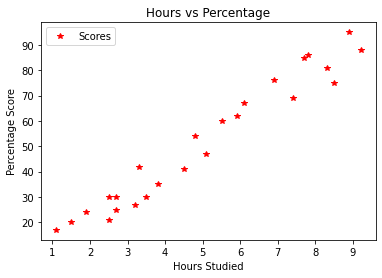

In [18]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='*',color='r')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [19]:
# The next step is to divide the data into inputs and outputs.
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [21]:
# the next step is to split this data into training and test sets.
# We'll do this by using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [23]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 



LinearRegression()

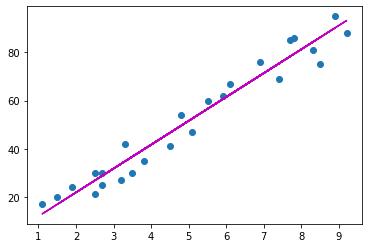

In [38]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color = "m");
plt.show()

In [44]:
 #Predictions
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [40]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [59]:
# You can also test with your own data

hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# Evaluating model - 

In [62]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [63]:
#Checking the accuracy of the model--
from sklearn.metrics import r2_score
print("R2 Score = ",r2_score(y_test,y_pred))  #checking the performance of model

R2 Score =  0.9454906892105356


# Thank you